<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/NLP/Kaggle_news_summary/Kaggle_new_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/sunnysai12345/news-summary/notebooks

In [17]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/news_summary.csv', encoding='iso-8859-1')
print(data.shape)
data.head()

(4514, 6)


,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


# Summary with gensim.summarization

In [20]:
data.headlines[0] # summary

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [29]:
DOCUMENT=data.ctext[0]
print(len(DOCUMENT))
DOCUMENT

2313


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [33]:
from gensim.summarization import summarize
Document_summary=summarize(DOCUMENT, ratio=0.1, split=False)
print(len(Document_summary))
Document_summary

464


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7.'

In [34]:
Document_summary=summarize(DOCUMENT, word_count=75, split=False)
print(len(Document_summary))
Document_summary

464


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7.'

# Summary by Latent Semantic Analysis

## Prepare Data

In [35]:
DOCUMENT_summary_ref=data.headlines[0] # summary
DOCUMENT_summary_ref

'Daman & Diu revokes mandatory Rakshabandhan in offices order'

In [36]:
DOCUMENT=data.ctext[0]
print(len(DOCUMENT))
DOCUMENT

2313


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.?It has been decided to celebrate the festival of Rakshabandhan on August 7. In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,? the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ? one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ? were issued by the Dama

In [37]:
import nltk
nltk.download('punkt')

sentences = nltk.sent_tokenize(DOCUMENT)
print(len(sentences))
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
16


['The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.',
 '?It has been decided to celebrate the festival of Rakshabandhan on August 7.',
 'In this connection, all offices/ departments shall remain open and celebrate the festival collectively at a suitable time wherein all the lady staff shall tie rakhis to their colleagues,?',
 'the order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ?',
 'one mandating the celebration of Rakshabandhan (left) and the other withdrawing the mandate (right) ?',
 'w

In [38]:
import numpy as np
import re
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['daman diu administration wednesday withdrew circular asked women staff tie rakhis male colleagues order triggered backlash employees ripped apart social mediathe union territorys administration forced retreat within hours issuing circular made compulsory staff celebrate rakshabandhan workplace',
       'decided celebrate festival rakshabandhan august',
       'connection offices departments shall remain open celebrate festival collectively suitable time wherein lady staff shall tie rakhis colleagues'],
      dtype='<U418')

## Text Representation with Feature Engineering

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)
# 160 word for 16 sentences

(160, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
administration,0.30,0.00,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
administrative,0.00,0.00,0.0,0.00,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
administrator,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
affairs,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
al,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.14,0.0,0.00,0.00
apart,0.15,0.00,0.0,0.00,0.0,0.44,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
areas,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.27,0.00
asked,0.15,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.37
attendance,0.00,0.00,0.0,0.23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
august,0.00,0.48,0.0,0.20,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


## Latent Semantic Analysis

In [41]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [42]:
td_matrix.shape

(160, 16)

In [43]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(160, 3) (3,) (3, 16)


In [44]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [45]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([7.10884897e-01, 5.86168156e-01, 4.14717956e-01, 3.99243262e-01,
       2.32314401e-01, 8.14953625e-01, 6.48544426e-01, 6.22652813e-01,
       1.33316912e-15, 3.04997930e-01, 1.10397456e-01, 5.77438268e-01,
       4.33658703e-01, 8.88920914e-02, 6.38422065e-01, 5.59966282e-01])

In [46]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()
top_sentence_indices

array([ 0,  1,  5,  6,  7, 11, 14, 15])

In [51]:
# Summary:
a='\n'.join(np.array(sentences)[top_sentence_indices])
print(len(a))
print(a)

1015
The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.
?It has been decided to celebrate the festival of Rakshabandhan on August 7.
were issued by the Daman and Diu administration a day apart.
The circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.
?The circular is ridiculous.
an official told Hindustan Times earlier in the day.
The RSS is the ideological parent of the ruling BJP.Last year, women ministers in the Modi government went to the border areas to celebrate the festival with soldiers.
A year before, all cabinet ministers were asked to go to their constituenci

In [52]:
print(len(DOCUMENT))

2313


# Summary by Text Rank

In [55]:
print(dt_matrix.shape) # TF IDF
dt_matrix
# 16 sentences, 160 words

(16, 160)


array([[0.29617183, 0.        , 0.        , ..., 0.14808591, 0.14808591,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23778078, 0.        ,
        0.21276607],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.33087301]])

In [56]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)
# Tim su tuong quan 16 cau nay

(16, 16)


array([[1.   , 0.104, 0.167, 0.024, 0.039, 0.297, 0.096, 0.163, 0.   ,
        0.058, 0.078, 0.   , 0.029, 0.   , 0.058, 0.055],
       [0.104, 1.   , 0.121, 0.096, 0.127, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.033, 0.   , 0.139, 0.099],
       [0.167, 0.121, 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.08 , 0.   , 0.   , 0.014, 0.   , 0.06 , 0.043],
       [0.024, 0.096, 0.   , 1.   , 0.053, 0.058, 0.133, 0.   , 0.   ,
        0.078, 0.   , 0.   , 0.036, 0.   , 0.038, 0.   ],
       [0.039, 0.127, 0.   , 0.053, 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.073, 0.   , 0.   , 0.   ],
       [0.297, 0.   , 0.   , 0.058, 0.   , 1.   , 0.078, 0.   , 0.   ,
        0.   , 0.   , 0.158, 0.122, 0.   , 0.   , 0.   ],
       [0.096, 0.   , 0.   , 0.133, 0.   , 0.078, 1.   , 0.148, 0.   ,
        0.   , 0.   , 0.   , 0.022, 0.   , 0.   , 0.   ],
       [0.163, 0.   , 0.   , 0.   , 0.   , 0.   , 0.148, 1.   , 0.   ,
        0.   , 0.   , 0.  

In [57]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)

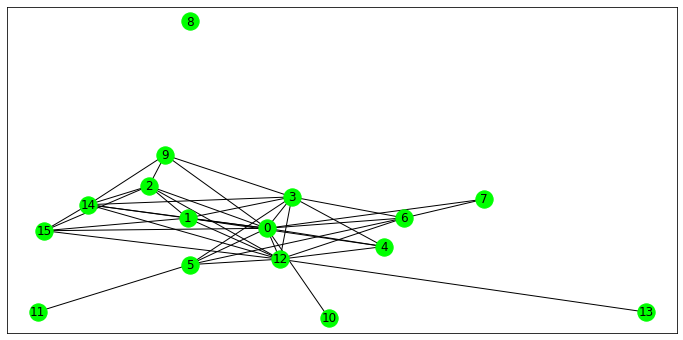

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [59]:
scores = networkx.pagerank(similarity_graph)
scores

{0: 0.08402715574631894,
 1: 0.06817553615141268,
 2: 0.0606769103760126,
 3: 0.06269033329887282,
 4: 0.05674163840460933,
 5: 0.06899558682434141,
 6: 0.061519726964287584,
 7: 0.05684394169335768,
 8: 0.0625,
 9: 0.05692218966211677,
 10: 0.0565037704645361,
 11: 0.05559125914957253,
 12: 0.06300623547721208,
 13: 0.05923237560535922,
 14: 0.06647327822120137,
 15: 0.060100061960788646}

In [60]:
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]
# 10 cau co diem so cao nhat

[(0.08402715574631894, 0),
 (0.06899558682434141, 5),
 (0.06817553615141268, 1),
 (0.06647327822120137, 14),
 (0.06300623547721208, 12),
 (0.06269033329887282, 3),
 (0.0625, 8),
 (0.061519726964287584, 6),
 (0.0606769103760126, 2),
 (0.060100061960788646, 15)]

In [62]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()
summary_text_rank='\n'.join(np.array(sentences)[top_sentence_indices])
print(len(summary_text_rank))
summary_text_rank

1635


'The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan at workplace.\n?It has been decided to celebrate the festival of Rakshabandhan on August 7.\nthe order, issued on August 1 by Gurpreet Singh, deputy secretary (personnel), had said.To ensure that no one skipped office, an attendance report was to be sent to the government the next evening.The two notifications ?\nwere issued by the Daman and Diu administration a day apart.\nThe circular was withdrawn through a one-line order issued late in the evening by the UT?s department of personnel and administrative reforms.\nThere are sensitivities involved.\nShe refused to be identified.The notice was issued on Daman and Diu 

# From Kaggle

In [126]:
import pandas as pd
import numpy as np

In [127]:
summary = pd.read_csv('/content/drive/My Drive/Data/NLP/Kaggle_new_summary/news_summary.csv', encoding='iso-8859-1')

In [128]:
print(summary.shape)

(4514, 6)


In [129]:
summary.head(2)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in offices order,http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.html?utm_source=inshorts&utm_medium...,The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The...,The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart o...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorcing rich man',http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_source=inshorts&utm_medium=referra...,"Malaika Arora slammed an Instagram user who trolled her for ""divorcing a rich man"" and ""having fun with the alimony"". ""Her life now is all about wearing short clothes, going to gym or salon, enjoy...","From her special numbers to TV?appearances, Bollywood actor Malaika Arora Khan has managed to carve her own identity. The actor, who made her debut in the Hindi film industry with the blockbuster ..."


In [130]:
pre2 = summary.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")
pre2.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in offices order,http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.html?utm_source=inshorts&utm_medium...,"Chhavi Tyagi 03 Aug 2017,Thursday http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.h...",The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart o...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorcing rich man',http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_source=inshorts&utm_medium=referra...,"Daisy Mowke 03 Aug 2017,Thursday http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_s...","From her special numbers to TV?appearances, Bollywood actor Malaika Arora Khan has managed to carve her own identity. The actor, who made her debut in the Hindi film industry with the blockbuster ..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS' form,http://www.hindustantimes.com/patna/bihar-igims-form-loses-virginity-after-row-opts-for-unmarried-instead/story-8XmHIg39otGBoZAYEBQxMK.html?utm_source=inshorts&utm_medium=referral&utm_campaign=ful...,"Arshiya Chopra 03 Aug 2017,Thursday http://www.hindustantimes.com/patna/bihar-igims-form-loses-virginity-after-row-opts-for-unmarried-instead/story-8XmHIg39otGBoZAYEBQxMK.html?utm_source=inshorts&...","The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna amended its marital declaration form on Thursday, replacing the word ?virgin? with ?unmarried? after controversy.Until now, new rec..."
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before being killed,http://indiatoday.intoday.in/story/abu-dujana-last-phone-call-lashkar-e-taiba-jammu-and-kashmir/1/1017550.html?utm_source=inshorts&utm_medium=referral&utm_campaign=fullarticle,"Sumedha Sehra 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/abu-dujana-last-phone-call-lashkar-e-taiba-jammu-and-kashmir/1/1017550.html?utm_source=inshorts&utm_medium=referral&utm_campai...","Lashkar-e-Taiba's Kashmir commander Abu Dujana was killed in an encounter in a village in Pulwama district of Jammu and Kashmir earlier this week. Dujana, who had managed to give the security forc..."
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of sex trafficking,http://indiatoday.intoday.in/story/sex-trafficking-mumbai-rescue-me-maharashtra-international-labour-organization-forced-labour-trafficking-traning-hotel-staff/1/1017210.html?utm_source=inshorts&u...,"Aarushi Maheshwari 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/sex-trafficking-mumbai-rescue-me-maharashtra-international-labour-organization-forced-labour-trafficking-traning-hotel-st...","Hotels in Mumbai and other Indian cities are to train their staff to spot signs of sex trafficking such as frequent requests for bed linen changes or a ""Do not disturb"" sign left on the door for d..."


In [131]:
pre2.text[0]

'Chhavi Tyagi 03 Aug 2017,Thursday http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.html?utm_source=inshorts&utm_medium=referral&utm_campaign=fullarticle  The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media. The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart on social media.The union territory?s administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate Rakshabandhan

In [132]:
pre = pd.DataFrame()
pre['text'] =  pre2['text']
pre['summary'] =pre2['headlines']

In [134]:
pre.head()

,text,summary
0,"Chhavi Tyagi 03 Aug 2017,Thursday http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.h...",Daman & Diu revokes mandatory Rakshabandhan in offices order
1,"Daisy Mowke 03 Aug 2017,Thursday http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_s...",Malaika slams user who trolled her for 'divorcing rich man'
2,"Arshiya Chopra 03 Aug 2017,Thursday http://www.hindustantimes.com/patna/bihar-igims-form-loses-virginity-after-row-opts-for-unmarried-instead/story-8XmHIg39otGBoZAYEBQxMK.html?utm_source=inshorts&...",'Virgin' now corrected to 'Unmarried' in IGIMS' form
3,"Sumedha Sehra 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/abu-dujana-last-phone-call-lashkar-e-taiba-jammu-and-kashmir/1/1017550.html?utm_source=inshorts&utm_medium=referral&utm_campai...",Aaj aapne pakad liya: LeT man Dujana before being killed
4,"Aarushi Maheshwari 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/sex-trafficking-mumbai-rescue-me-maharashtra-international-labour-organization-forced-labour-trafficking-traning-hotel-st...",Hotel staff to get training to spot signs of sex trafficking


## Perform Data Cleansing

In [135]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        yield row

In [136]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [137]:
from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.19 mins


In [138]:
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.04 mins


In [139]:
text[0]

'chhavi tyagi 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle the administration of union territory daman and diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of rakshabandhan on august the administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media the daman and diu administration on wednesday withdrew circular that asked women staff to tie rakhis on male colleagues after the order triggered backlash from employees and was ripped apart on social media.the union territory administration was forced to retreat within 24 hours of issuing the circular that made it compulsory for its staff to celebrate rakshabandhan at workplace it has been decided to celebrate the festival of rakshabandhan on august in this connection all offices/ departments shall remain open and c

In [140]:
summary[0]

'_START_ daman diu revokes mandatory rakshabandhan in offices order _END_'

In [141]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)
pre

,text,summary,cleaned_text,cleaned_summary
0,"Chhavi Tyagi 03 Aug 2017,Thursday http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.h...",Daman & Diu revokes mandatory Rakshabandhan in offices order,chhavi tyagi 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle the administration of union territory daman and diu has revoked its order ...,_START_ daman diu revokes mandatory rakshabandhan in offices order _END_
1,"Daisy Mowke 03 Aug 2017,Thursday http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_s...",Malaika slams user who trolled her for 'divorcing rich man',daisy mowke 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle malaika arora slammed an instagram user who trolled her for divorcing rich ...,_START_ malaika slams user who trolled her for divorcing rich man _END_
2,"Arshiya Chopra 03 Aug 2017,Thursday http://www.hindustantimes.com/patna/bihar-igims-form-loses-virginity-after-row-opts-for-unmarried-instead/story-8XmHIg39otGBoZAYEBQxMK.html?utm_source=inshorts&...",'Virgin' now corrected to 'Unmarried' in IGIMS' form,arshiya chopra 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle the indira gandhi institute of medical sciences igims in patna on thursd...,_START_ virgin now corrected to unmarried in igims form _END_
3,"Sumedha Sehra 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/abu-dujana-last-phone-call-lashkar-e-taiba-jammu-and-kashmir/1/1017550.html?utm_source=inshorts&utm_medium=referral&utm_campai...",Aaj aapne pakad liya: LeT man Dujana before being killed,sumedha sehra 03 aug 2017 thursday indiatoday.intoday.in utm_source=inshorts utm_medium=referral utm_campaign=fullarticle lashkar-e-taiba kashmir commander abu dujana who was killed by security fo...,_START_ aaj aapne pakad liya let man dujana before being killed _END_
4,"Aarushi Maheshwari 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/sex-trafficking-mumbai-rescue-me-maharashtra-international-labour-organization-forced-labour-trafficking-traning-hotel-st...",Hotel staff to get training to spot signs of sex trafficking,aarushi maheshwari 03 aug 2017 thursday indiatoday.intoday.in utm_source=inshorts utm_medium=referral utm_campaign=fullarticle hotels in maharashtra will train their staff to spot signs of sex tra...,_START_ hotel staff to get training to spot signs of sex trafficking _END_
...,...,...,...,...
4509,"Mansha Mahajan 24 Feb 2017,Friday http://indiatoday.intoday.in/story/rasna-eyes-rs-250-cr-revenue-from-snack-category/1/890034.html Fruit juice concentrate maker Rasna is eyeing a revenue of ?250...",Rasna seeking ?250 cr revenue from snack category: Chairman,mansha mahajan 24 feb 2017 friday indiatoday.intoday.in fruit juice concentrate maker rasna is eyeing revenue of 250 crore in the next three years from the snack category chairman piruz khambatta ...,_START_ rasna seeking 250 cr revenue from snack category chairman _END_
4510,"Dishant Sharma 03 Aug 2017,Thursday http://indiatoday.intoday.in/story/sachin-tendulkar-rekha-rajya-sabha-nominated-members-naresh-agarwal/1/1017714.html?utm_source=inshorts&utm_medium=referral&ut...",Sachin attends Rajya Sabha after questions on attendance,dishant sharma 03 aug 2017 thursday indiatoday.intoday.in utm_source=inshorts utm_medium=referral utm_campaign=fullarticle former indian cricketer sachin tendulkar attended the rajya sabha couple ...,_START_ sachin attends rajya sabha after questions on attendance _END_
4511,"Tanya Dhingra 03 Aug 2017,Thursday http://www.hindustantimes.com/bollywood/secret-superstar-don-t-rob-childhoods-says-aamir-khan-on-kids-reality-shows/story-g1wZiloXHkg1ShKnD0z9zJ.html?utm_sourc

In [142]:
text_count = []
summary_count = []

In [143]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [144]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

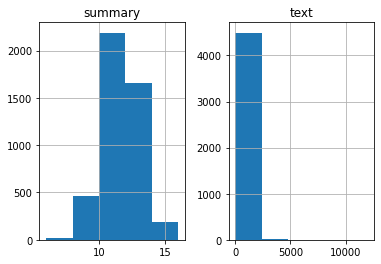

In [145]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [146]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

0.9997784669915818


In [160]:
#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=800):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

0.9548072662826761


In [161]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=800
max_summary_len=15

In [162]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [163]:
print(cleaned_summary.shape)
print(post_pre.shape)
post_pre.head(2)
# Loai bo nhung doan van co do dai text > 800 va summary > 15

(4514,)
(4309, 2)


,text,summary
0,chhavi tyagi 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle the administration of union territory daman and diu has revoked its order ...,_START_ daman diu revokes mandatory rakshabandhan in offices order _END_
1,daisy mowke 03 aug 2017 thursday www.hindustantimes.com utm_source=inshorts utm_medium=referral utm_campaign=fullarticle malaika arora slammed an instagram user who trolled her for divorcing rich ...,_START_ malaika slams user who trolled her for divorcing rich man _END_


## SEQ2SEQ MODEL BUILDING

In [168]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.2,random_state=0,shuffle=True)

In [169]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(y_val.shape)

(3447,)
(3447,)
(862,)
(862,)


In [170]:
x_tr[:3]

array(['chhavi tyagi 04 mar 2017 saturday indiatoday.intoday.in addressing an election rally in uttar pradesh jaunpur prime minister narendra modi said that if the bjp wins uttar pradesh assembly elections it will waive off farmers loan first claiming that the bjp will celebrate holi with the party victory in up modi slammed the current state government saying mothers and daughters are not safe under the akhilesh yadav government rounding off day of hectic electioneering in uttar pradesh prime minster narendra modi has arrived for town hall rally in varanasi his lok sabha constituency.earlier in the day modi akhilesh yadav and rahul gandhi held separate road shows in the holy city bsp supremo mayawati also held rally on the outskirts after samajwadi party and congress supporters were pelted with stones during their joint roadshow in varanasi the city police asked akhilesh yadav and rahul gandhi to speed up the event prime minister modi who also addressed rally in jaupur attacked the sa

In [171]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

RARE WORD ANALYSIS FOR X i.e 'text'

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

In [172]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 59.73234556099892
Total Coverage of rare words: 3.0728859631885768


In [173]:
tot_cnt #gives the size of vocabulary (which means every unique words in the text)

41845

In [174]:
cnt #gives me the no. of rare words whose count falls below threshold

24995

In [175]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 16851


In [176]:
print(x_tr_seq[0])

[331, 320, 1707, 359, 34, 152, 49, 48, 3, 1386, 24, 233, 1783, 3, 249, 157, 199, 50, 250, 102, 10, 7, 72, 1, 86, 3343, 249, 157, 288, 529, 15, 23, 5427, 169, 401, 1157, 80, 1572, 7, 1, 86, 23, 1784, 4501, 14, 1, 78, 980, 3, 54, 102, 1081, 1, 909, 68, 45, 215, 6242, 5, 3866, 26, 25, 1913, 106, 1, 886, 294, 45, 14699, 169, 122, 4, 7845, 10831, 3, 249, 157, 199, 11799, 250, 102, 12, 1708, 8, 1543, 1864, 1783, 3, 2255, 22, 893, 547, 1936, 180, 3, 1, 122, 102, 886, 294, 5, 551, 291, 349, 1321, 333, 689, 3, 1, 3867, 217, 2666, 4757, 2583, 28, 349, 1783, 6, 1, 6506, 29, 944, 78, 5, 132, 1730, 35, 7846, 14, 2540, 99, 42, 1082, 6243, 3, 2255, 1, 217, 43, 124, 886, 294, 5, 551, 291, 2, 1211, 54, 1, 443, 199, 50, 102, 31, 28, 2434, 1783, 3, 1006, 1, 944, 78, 215, 86, 23, 1784, 4501, 14, 1, 78, 980, 3, 54, 401, 1157, 1937, 2, 20, 1, 80, 312, 29, 36, 197, 2, 388, 1, 86, 9, 5774, 8, 7449, 3, 1, 68, 145, 15, 11, 3, 4169, 8, 75, 125, 2615, 147, 394, 5428, 3006, 3, 1, 505, 326, 529, 55, 15, 339, 5775, 

In [177]:
print(x_tr[0])

[  331   320  1707   359    34   152    49    48     3  1386    24   233
  1783     3   249   157   199    50   250   102    10     7    72     1
    86  3343   249   157   288   529    15    23  5427   169   401  1157
    80  1572     7     1    86    23  1784  4501    14     1    78   980
     3    54   102  1081     1   909    68    45   215  6242     5  3866
    26    25  1913   106     1   886   294    45 14699   169   122     4
  7845 10831     3   249   157   199 11799   250   102    12  1708     8
  1543  1864  1783     3  2255    22   893   547  1936   180     3     1
   122   102   886   294     5   551   291   349  1321   333   689     3
     1  3867   217  2666  4757  2583    28   349  1783     6     1  6506
    29   944    78     5   132  1730    35  7846    14  2540    99    42
  1082  6243     3  2255     1   217    43   124   886   294     5   551
   291     2  1211    54     1   443   199    50   102    31    28  2434
  1783     3  1006     1   944    78   215    86   

In [178]:
print(x_tr.shape,x_val.shape)

(3447, 800) (862, 800)


RARE WORD ANALYSIS FOR Y i.e 'summary'

tot_cnt gives the size of vocabulary (which means every unique words in the text)

cnt gives me the no. of rare words whose count falls below threshold

tot_cnt - cnt gives me the top most common words

In [179]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [180]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 86.27038400841663
Total Coverage of rare words: 28.771042480905308


In [181]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 1045


In [182]:
print(y_tr.shape,y_val.shape)

(3447, 15) (862, 15)


We will now remove "Summary" i.e Y (both train and val) which has only START and END

In [183]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [184]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [185]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

Size of vocabulary from the w2v model = 16851


In [186]:
K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 800)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 800, 200)     3370200     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 800, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [187]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,
                  epochs=25,callbacks=[es],batch_size=128,
                  validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/25


In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Next, let’s build the dictionary to convert the index to word for target and source vocabulary:

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

We are defining a function below which is the implementation of the inference process

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

Run the model over the data to see the results

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")